In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt
#imports

In [2]:
names = ["height","lenght","area","eccen","p_black","p_and","mean_tr","blackpix","blackand","wb_trans","classe"]
data = "page-blocks.data"
df = pd.read_fwf(data, names = names)
df
#1=text 2=Horizontal line 3=Picture 4=Vertical line 5=Graphic

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,classe
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1
...,...,...,...,...,...,...,...,...,...,...,...
5468,4,524,2096,131.000,0.542,0.603,40.57,136,264,28,2
5469,7,4,28,0.571,0.714,0.929,10.00,20,26,2,1
5470,6,95,570,15.833,0.300,0.911,1.64,171,519,104,1
5471,7,41,287,5.857,0.213,0.801,1.36,61,230,45,1


In [3]:
#catégories de blocs
text = df[df.classe == 1]
hor = df[df.classe == 2]
pic = df[df.classe == 3]
ver = df[df.classe == 4]
graph = df[df.classe == 5]
print("Il y a {ntext} Textes, {nhor} blocs horizontaux, {npic} images, {nver} blocs verticaux, {ngraph} graphiques".format(ntext=len(text),nhor = len(hor),npic = len(pic),nver = len(ver),ngraph = len(graph)))


Il y a 4913 Textes, 329 blocs horizontaux, 28 images, 88 blocs verticaux, 115 graphiques


In [4]:
# Ajout d'une colonne, on rajoute ici les catégories de blocs
values = []
for x in df.classe:
    if x == 1:
        values.append("Text")
    elif x == 2:
        values.append("Horizontal_Line")
    elif x == 3:
        values.append("Picture")
    elif x == 4:
        values.append("Vertical_Line")
    elif x == 5:
        values.append("Graphic")
df["Catégorie_bloc"] = values
df


,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,classe,Catégorie_bloc
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1,Text
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1,Text
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1,Text
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1,Text
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1,Text
...,...,...,...,...,...,...,...,...,...,...,...,...
5468,4,524,2096,131.000,0.542,0.603,40.57,136,264,28,2,Horizontal_Line
5469,7,4,28,0.571,0.714,0.929,10.00,20,26,2,1,Text
5470,6,95,570,15.833,0.300,0.911,1.64,171,519,104,1,Text
5471,7,41,287,5.857,0.213,0.801,1.36,61,230,45,1,Text


In [5]:
X = df[["height","lenght","area","eccen","p_black","p_and","mean_tr","blackpix","blackand","wb_trans","classe"]] 
Y = df["classe"]
# Fait correspondre l'index des données X avec celles de Y
assert(sum(Y.index == X.index) == Y.shape[0])

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)


In [9]:
## 3) Standardiser les valeurs

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

In [10]:
## Utilisons plusieurs aglorithmes de Machine Learning
# 1) Linear Regression 

from sklearn.linear_model import LinearRegression 
#hyperparameters: fit the intercept
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.coef_

array([ 2.92168567e-16,  1.34848052e-17, -4.51159174e-18, -3.90055922e-17,
       -1.05496650e-14, -3.14488465e-15,  2.11991687e-17, -6.38681201e-19,
        3.14933292e-19, -3.76722058e-18,  1.00000000e+00])

In [13]:
model.intercept_

7.327471962526033e-15

In [14]:
Y_test

0       1
3262    1
1897    1
2280    1
5197    2
       ..
1218    1
1232    1
4652    1
2080    1
1662    1
Name: classe, Length: 1807, dtype: int64

In [15]:
# 3eme méthode: KNN
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=4)
model2.fit(X,Y)
Y_model2=model2.predict(X)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(Y,Y_model2)

0.965466837200804

In [17]:
def draw_confusion_matrix(y_test, predictions, title):
    """
    Créé et affiche la matrice de confusion des données de Y_test et de celles sur lesquelles on a fait la prédiction.
    Permet d'évaluer la qualité de la classification souhaitée.
    Plus les valeurs diagonales sont élevées, plus le classifieur prédit correctement.
    """
    from sklearn.metrics import confusion_matrix,accuracy_score
    import matplotlib.pyplot as plt
    cm    = confusion_matrix(y_test, predictions)
    accur = accuracy_score  (y_test, predictions)
    
    plt.matshow  (cm)
    plt.ylabel   ('True Label')
    plt.xlabel   ('Predicted Label')
    plt.suptitle ('Confusion matrix (Accuracy of %.2f) for [%s]'%(accur,title))
    plt.colorbar ()
    plt.show     ()

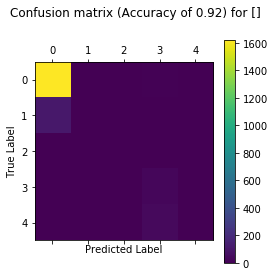

In [18]:

draw_confusion_matrix(Y_test, model2.predict(X_test), "")

In [17]:
# knn en changeant les parametres

In [19]:
model3=KNeighborsClassifier(n_neighbors=2)
model3.fit(X,Y)
Y_model3=model3.predict(X)
accuracy_score(Y,Y_model3)

0.9740544491138315

In [20]:
# 4eme methode : Random Forest (CLF  = Gradient Boosting)
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(random_state=0)
clf.fit(X,Y)


C:\Users\meric\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [21]:
Y_model4 = clf.predict(X)

In [22]:
accuracy_score(Y,Y_model4)
#Random Forest gradient boosting have the best accuracy

0.9998172848529143

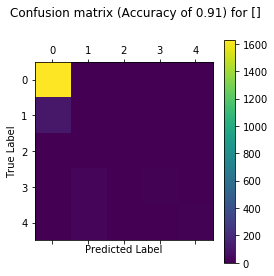

In [23]:
draw_confusion_matrix(Y_test, clf.predict(X_test), "")

In [23]:
# dernier algo comme exemple : Support Vector Machine (svm)

In [24]:
## supprimer les warnings dans jupyter

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [26]:
from sklearn import svm
svr = svm.SVR(kernel='linear')
svr.fit(X,Y)



In [ ]:
draw_confusion_matrix(Y_test, svr.predict(X_test), "") 

In [28]:
## aller au delà des paramètres par défaut avec un grid search

from sklearn.model_selection import GridSearchCV
parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

C:\Users\meric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9930499498742363 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [29]:
## affiner le grid search


parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

C:\Users\meric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9498114445805156 SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [30]:
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

C:\Users\meric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9753538848870933 SVR(C=2.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [32]:
parameters = {  'C'       : [2.5, 3, 4]   ,
                'kernel'  : ['rbf', 'poly', 'sigmoid'],
                'gamma'   : [ 0.01, 0.05, 0.07],
                 "degree" : [1,3,5]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

C:\Users\meric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9954101552893518 SVR(C=4, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [34]:
parameters = {  'C'       : [10, 15, 20, 30]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [0.01, 0.05, 0.15],
                 "degree" : [1,2]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

C:\Users\meric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9936505101496499 SVR(C=15, cache_size=200, coef0=0.0, degree=1, epsilon=0.01, gamma=0.03,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [37]:
## fonction de test

def test_hyperparametres(hyperparametres):
    grid       = GridSearchCV(svm.SVR(), hyperparametres, n_jobs=-1)
    grid.fit(X_train, Y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_

In [ ]:
hyperparametres = {  'gamma' : [0.01, 0.1, 0.5, 0.015]          ,
                  "kernel" : ['linear', 'poly', 'rbf', 'sigmoid',  ],
                  "C" : [105, 200]}
test_hyperparametres(hyperparametres)

C:\Users\meric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
from sklearn.linear_model import Lasso


In [ ]:
def test_hyperparametres(algo, hyperparametres):
    grid       = grid_search.GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(X_train, Y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_

In [ ]:
algo = Lasso()
params = {"max_iter" : [ 1000],
         "alpha" : [0.1], 
         "selection": ["random", "cyclic"]}
grid       = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_) 